In [ ]:
!pip install regressors

In [5]:
#Libraries and packages required 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import linregress
from regressors import stats

In [405]:
data =  pd.read_csv('/content/Wage1.csv', sep='|')
data.columns = ['wage','educ','exper','tenure','nonwhite','female','married','numdep','smsa',
'northcen','south','west','construc','ndurman','trcommpu','trade','services','profserv',
'profocc','clerocc','servocc','lwage','expersq','tenursq']
data['smsa*educ']=data['educ']*data['smsa']

In [501]:
RemoveVariables = ['numdep','construc','ndurman','trcommpu',
                   'northcen', 'south', 'west']
dataCopyModel = data[data.columns.difference(RemoveVariables)]

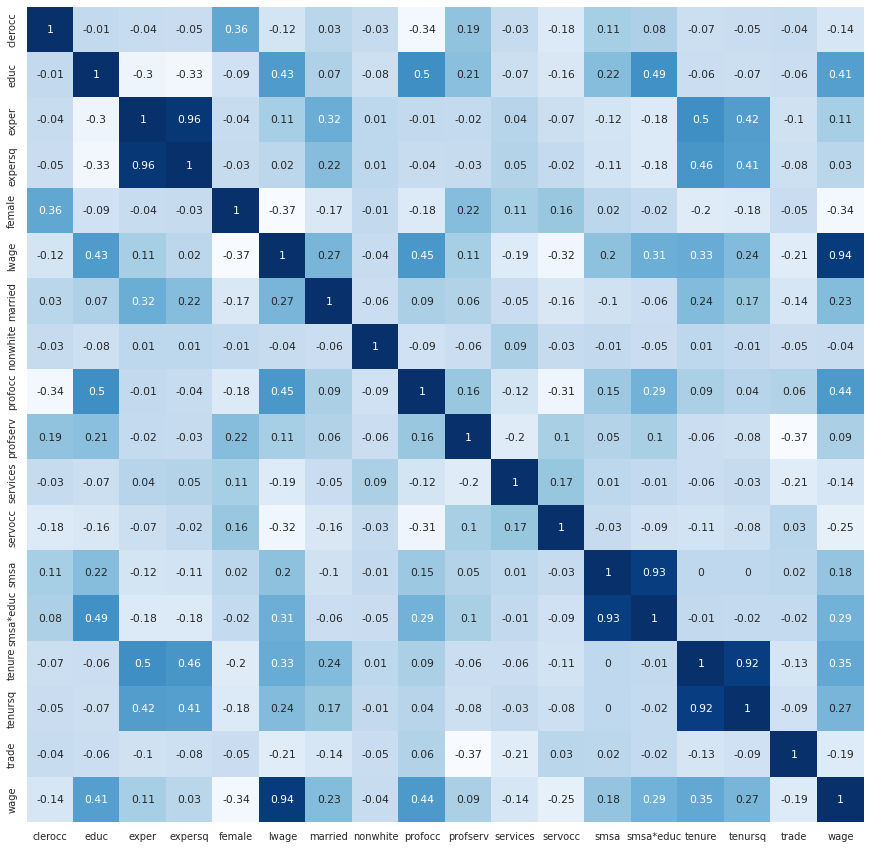

In [407]:
cm = np.corrcoef(dataCopyModel.values.T).round(2)
sns.set(font_scale=0.9, rc={'figure.figsize':(15,15)})
sns.heatmap(cm, annot=True, yticklabels=dataCopyModel.columns, 
xticklabels=dataCopyModel.columns, cmap='Blues',cbar=False)
plt.show()

# First Model

In [409]:
#Regular Model: Without Trained
Explanatories = ['educ','exper','female','smsa','smsa*educ']
Explained = ['wage']

X = dataCopyModel[Explanatories].values
Y= dataCopyModel[Explained].values

Model = LinearRegression()
Model.fit(X,Y)
Y_pred = Model.predict(X)

Model.intercept_ = Model.intercept_[0]
Model.coef_ = Model.coef_.reshape(-1)
X_test = X.copy()
Y_test= Y.reshape(-1)
MSE = metrics.mean_squared_error(Y_test,Y_pred)
print("==========Summary==========")
print("MSE: ", MSE.round(4))
stats.summary(Model,X_test,Y_test, Explanatories)

==========Summary==========
MSE:  9.1727
Residuals:
     Min      1Q  Median     3Q    Max
-14.5901 -1.1013  0.4434 1.9133 6.6838


Coefficients:
            Estimate  Std. Error  t value   p value
_intercept -0.521083    0.996990  -0.5227  0.601434
educ        0.441389    0.026962  16.3708  0.000000
exper       0.064645    0.007808   8.2789  0.000000
female     -2.170103    0.260903  -8.3177  0.000000
smsa       -1.347594    1.192416  -1.1301  0.258934
smsa*educ   0.190865    0.028487   6.7001  0.000000
---
R-squared:  0.32618,    Adjusted R-squared:  0.31970
F-statistic: 50.34 on 5 features


In [411]:
#Trained model
x_train, x_test, y_train, y_test = train_test_split(X,Y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(Y)

x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_[-1]
y_test = y_test.reshape(-1)
mse = metrics.mean_squared_error(y_test,y_pred)
print("==========Summary==========")
print("MSE: ", mse.round(4))
stats.summary(model,x_test,y_test, Explanatories)

==========Summary==========
MSE:  1.12
Residuals:
    Min      1Q  Median     3Q    Max
-4.2729 -0.3119  0.2372 0.6532 1.6788


Coefficients:
            Estimate  Std. Error  t value   p value
_intercept  0.000000    0.093781   0.0000  1.000000
educ        0.263651    0.133286   1.9781  0.050017
exper       0.226160    0.105687   2.1399  0.034216
female     -0.268981    0.092355  -2.9125  0.004217
smsa       -0.309902    0.333226  -0.9300  0.354078
smsa*educ   0.519401    0.377246   1.3768  0.170915
---
R-squared:  0.28954,    Adjusted R-squared:  0.26135
F-statistic: 10.27 on 5 features


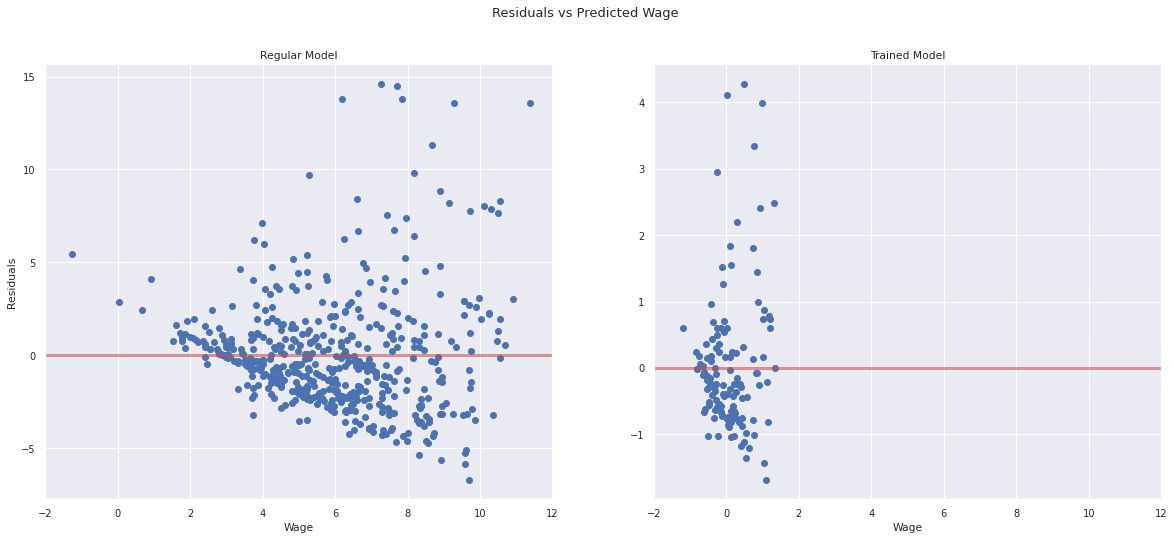

In [490]:
Residuals = np.subtract(Y_test,Y_pred.reshape(-1)) 
residuals = np.subtract(y_test,y_pred.reshape(-1)) 
x_gr = np.linspace(-3,13)
y_gr = x_gr*0

fig, axes = plt.subplots(1,2, figsize=(20,8), sharex=True)
fig.suptitle('Residuals vs Predicted Wage')
axes[0].scatter(Y_pred, Residuals)
axes[0].plot(x_gr,y_gr,'r',linewidth=3,alpha=0.6)
axes[0].set_title('Regular Model')
axes[0].set_xlim([-2,12])
axes[0].set_xlabel('Wage')
axes[0].set_ylabel('Residuals')
axes[1].scatter(y_pred, residuals)
axes[1].plot(x_gr,y_gr,'r',linewidth=3,alpha=0.6)
axes[1].set_title('Trained Model')
axes[1].set_xlabel('Wage')
plt.show()




# Second model 

In [413]:
#Regular Model
Explanatories2 = ['educ','exper','female','smsa*educ', 'profocc','tenursq','expersq',
                  'tenure','trade','services', 'servocc']
Explained = ['lwage']

X2 = dataCopyModel[Explanatories2].values
Y2 = dataCopyModel[Explained].values

Model2 = LinearRegression(fit_intercept=True)
Model2.fit(X2,Y2)
Y_pred2 = Model2.predict(X2)

Model2.intercept_ = Model2.intercept_[0]
Model2.coef_ = Model2.coef_.reshape(-1)
X_test2 = X2.copy()
Y_test2= Y2.reshape(-1)
MSE2= metrics.mean_squared_error(Y_test2,Y_pred2)
print("==========Summary==========")
print("MSE: ", MSE2.round(4))
stats.summary(Model2,X_test2,Y_test2, Explanatories2)

==========Summary==========
MSE:  0.1306
Residuals:
    Min     1Q  Median     3Q    Max
-1.2627 -0.222  0.0211 0.2126 1.6196


Coefficients:
            Estimate  Std. Error  t value   p value
_intercept  0.870296    0.099348   8.7600  0.000000
educ        0.041791    0.003462  12.0696  0.000000
exper       0.026517    0.004041   6.5627  0.000000
female     -0.273790    0.032345  -8.4647  0.000000
smsa*educ   0.012457    0.002587   4.8142  0.000002
profocc     0.195693    0.038698   5.0569  0.000001
tenursq    -0.000348    0.000092  -3.7741  0.000179
expersq    -0.000539    0.000024 -22.6249  0.000000
tenure      0.021892    0.006105   3.5857  0.000368
trade      -0.239205    0.035617  -6.7160  0.000000
services   -0.228835    0.054780  -4.1773  0.000035
servocc    -0.130190    0.048314  -2.6947  0.007272
---
R-squared:  0.53695,    Adjusted R-squared:  0.52704
F-statistic: 54.19 on 11 features


In [498]:
#Trained model
Explanatories2 = ['educ','exper','female','smsa*educ', 'profocc','expersq',
                  'tenure','trade','services','tenursq','servocc']
Explained = ['lwage']

X2 = dataCopyModel[Explanatories2].values
Y2 = dataCopyModel[Explained].values
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2,Y2)
sc_x = StandardScaler().fit(X2)
sc_y = StandardScaler().fit(Y2)

x_train2 = sc_x.fit_transform(x_train2)
x_test2 = sc_x.transform(x_test2)
y_train2 = sc_y.fit_transform(y_train2)
y_test2 = sc_y.transform(y_test2)

model2 = LinearRegression(fit_intercept=True)
model2.fit(x_train2,y_train2)
y_pred2 = model2.predict(x_test2)

model2.intercept_ = model2.intercept_[0]
model2.coef_ = model2.coef_[-1]
y_test2 = y_test2.reshape(-1)
mse2 = metrics.mean_squared_error(y_test2,y_pred2)
print("==========Summary==========")
print("MSE: ", mse2.round(4))
stats.summary(model2,x_test2,y_test2, Explanatories2)

==========Summary==========
MSE:  0.3772
Residuals:
    Min     1Q  Median     3Q    Max
-1.9493 -0.418  0.0486 0.3519 1.2551


Coefficients:
            Estimate  Std. Error  t value   p value
_intercept -0.000000    0.055550  -0.0000  1.000000
educ        0.220858    0.068028   3.2466  0.001483
exper       0.659665    0.165812   3.9784  0.000114
female     -0.247224    0.055832  -4.4280  0.000020
smsa*educ   0.145586    0.063459   2.2942  0.023372
profocc     0.158036    0.064865   2.4364  0.016178
expersq    -0.592048    0.157849  -3.7507  0.000264
tenure      0.298124    0.134973   2.2088  0.028929
trade      -0.199267    0.059524  -3.3477  0.001064
services   -0.141185    0.073851  -1.9118  0.058091
tenursq    -0.153113    0.153424  -0.9980  0.320131
servocc    -0.108707    0.063954  -1.6998  0.091550
---
R-squared:  0.60899,    Adjusted R-squared:  0.57314
F-statistic: 16.99 on 11 features


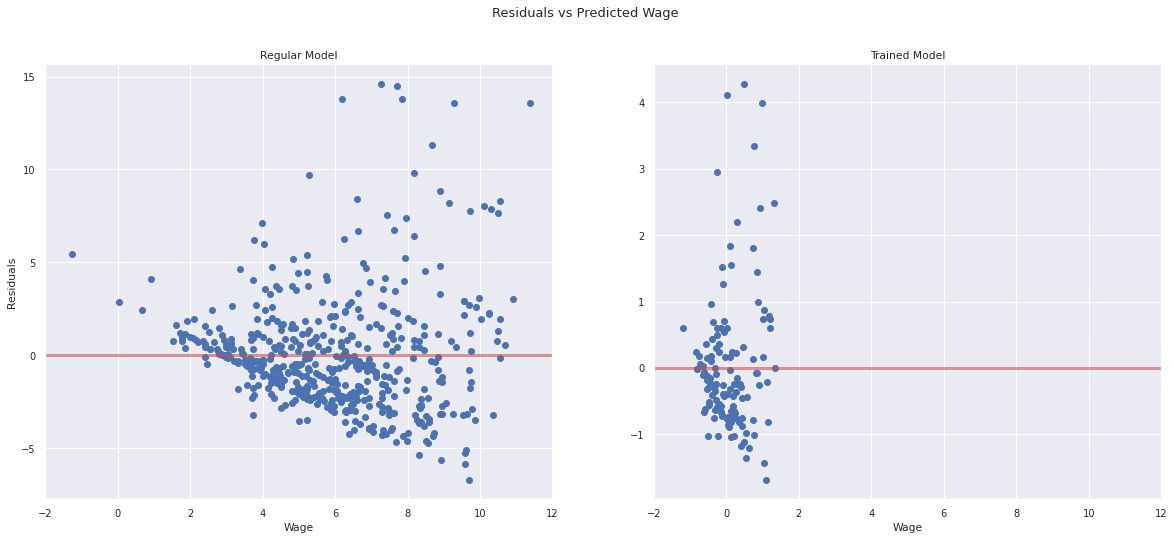

In [499]:
Residuals2 = np.subtract(Y_test2,Y_pred2.reshape(-1)) 
residuals2 = np.subtract(y_test2,y_pred2.reshape(-1)) 
x_gr = np.linspace(-3,13)
y_gr = x_gr*0

fig, axes = plt.subplots(1,2, figsize=(20,8), sharex=True)
fig.suptitle('Residuals vs Predicted Wage')
axes[0].scatter(Y_pred, Residuals)
axes[0].plot(x_gr,y_gr,'r',linewidth=3,alpha=0.6)
axes[0].set_title('Regular Model')
axes[0].set_xlim([-2,12])
axes[0].set_xlabel('Wage')
axes[0].set_ylabel('Residuals')
axes[1].scatter(y_pred, residuals)
axes[1].plot(x_gr,y_gr,'r',linewidth=3,alpha=0.6)
axes[1].set_title('Trained Model')
axes[1].set_xlabel('Wage')
plt.show()